<a href="https://colab.research.google.com/github/tedwards523/ReadME.md/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## this sets some style parameters
sns.set()

df = pd.read_csv('https://raw.githubusercontent.com/smart-stats/ds4bio_book/main/book/assetts/kirby21AllLevels.csv')
df.head(4)



,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0.0,374.0,128.3013,51.8593,1,1,127,1378295,1268519
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0.0,300.0,135.0683,53.6471,1,1,127,1378295,1268519
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15.0,295.0,193.5488,32.2733,1,1,127,1378295,1268519
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10.0,335.0,193.7051,32.7869,1,1,127,1378295,1268519


In [7]:
# Filter for type I, level I telencephalon (left)
telencephalon_L_volume = df[(df['type'] == 1) & (df['level'] == 1) & (df['roi'] == 'Telencephalon_L')]['volume'].iloc[0]

# Filter for type I, level I telencephalon (right)
telencephalon_R_volume = df[(df['type'] == 1) & (df['level'] == 1) & (df['roi'] == 'Telencephalon_R')]['volume'].iloc[0]

# Get ICV and TBV for the subject
# Assuming ICV and TBV are consistent across rows for a given subject (type 1, level 1)
subject_data = df[(df['type'] == 1) & (df['level'] == 1)].iloc[0]
icv = subject_data['icv']
tbv = subject_data['tbv']

# Calculate fractions for Left Telencephalon
icv_fraction_L = telencephalon_L_volume / icv
tbv_fraction_L = telencephalon_L_volume / tbv

# Calculate fractions for Right Telencephalon
icv_fraction_R = telencephalon_R_volume / icv
tbv_fraction_R = telencephalon_R_volume / tbv

# Print the results
print(f"Telencephalon_L_volume: {telencephalon_L_volume}")
print(f"Telencephalon_R_volume: {telencephalon_R_volume}")
print(f"ICV_fraction_L: {icv_fraction_L:.6f}")
print(f"TBV_fraction_L: {tbv_fraction_L:.6f}")
print(f"ICV_fraction_R: {icv_fraction_R:.6f}")
print(f"TBV_fraction_R: {tbv_fraction_R:.6f}")

Telencephalon_L_volume: 531111
Telencephalon_R_volume: 543404
ICV_fraction_L: 0.385339
TBV_fraction_L: 0.418686
ICV_fraction_R: 0.394258
TBV_fraction_R: 0.428377


In [13]:
all_regions_df = df.groupby(['type', 'level'])['volume'].sum().reset_index()
all_regions_df = all_regions_df.rename(columns={'volume': 'total_volume'})
display(all_regions_df.head())

,type,level,total_volume
0,1,1,25622342
1,1,2,25622426
2,1,3,25622693
3,1,4,25623353
4,1,5,25624463


In [16]:
t1l2_data = df[(df['type'] == 1) & (df['level'] == 2)]
print("Filtered data (t1l2_data) created successfully. Displaying the first 5 rows:")
display(t1l2_data.head())

Filtered data (t1l2_data) created successfully. Displaying the first 5 rows:


,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level,id,icv,tbv
8,9,kirby127a_3_1_ax.img,CerebralCortex_L,276965,0.0,249.0,88.5014,27.7510,1,2,127,1378295,1268519
9,10,kirby127a_3_1_ax.img,CerebralCortex_R,282858,0.0,295.0,93.7283,28.1726,1,2,127,1378295,1268519
10,11,kirby127a_3_1_ax.img,CerebralNucli_L,12380,14.0,273.0,165.5364,28.7978,1,2,127,1378295,1268519
11,12,kirby127a_3_1_ax.img,CerebralNucli_R,13073,16.0,273.0,168.7348,30.4016,1,2,127,1378295,1268519
12,13,kirby127a_3_1_ax.img,Thalamus_L,6342,38.0,268.0,192.1482,24.4523,1,2,127,1378295,1268519


**Reasoning**:
To visualize the 'volume' for each 'roi' for 'type' 1 and 'level' 2, I will generate a bar plot using the `t1l2_data` DataFrame, setting 'roi' on the x-axis and 'volume' on the y-axis, and then display it.



/tmp/ipython-input-2972084338.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




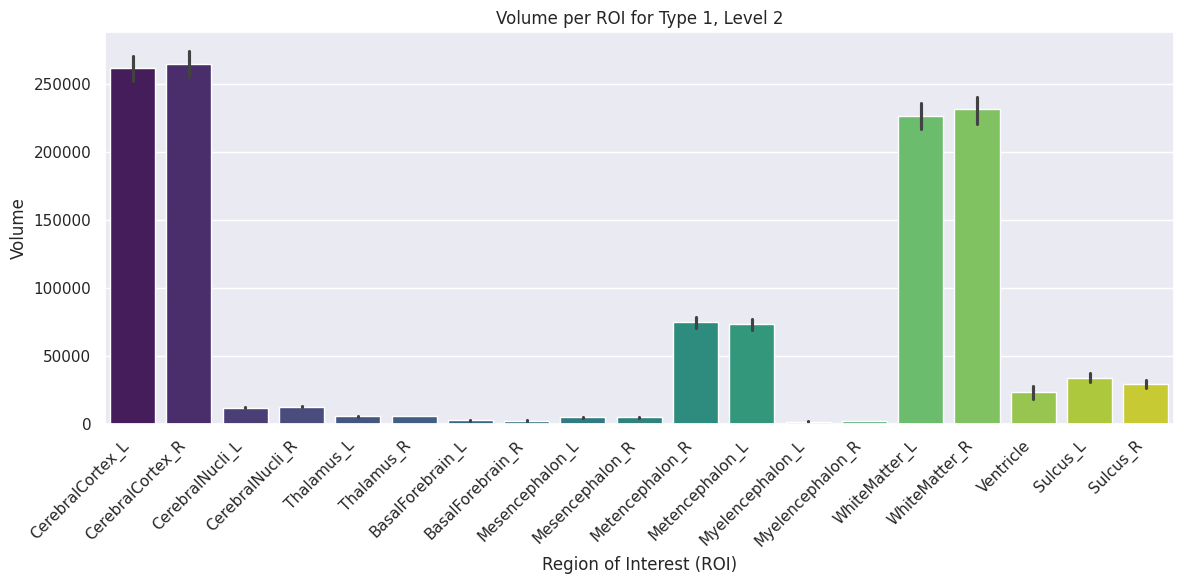

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(x='roi', y='volume', data=t1l2_data, palette='viridis')
plt.title('Volume per ROI for Type 1, Level 2')
plt.xlabel('Region of Interest (ROI)')
plt.ylabel('Volume')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


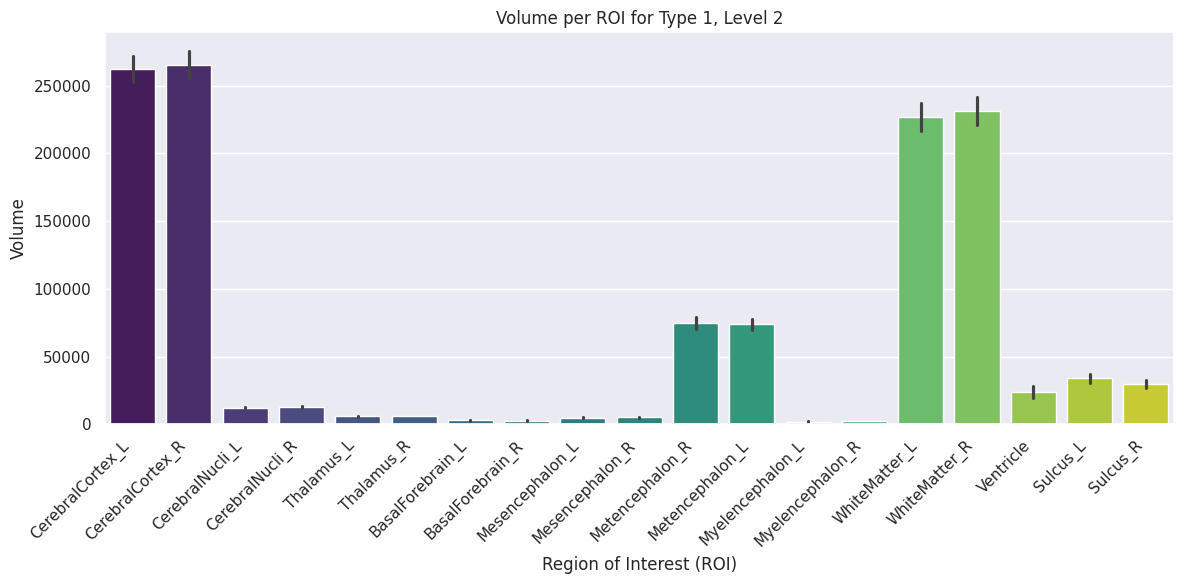

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='roi', y='volume', data=t1l2_data, palette='viridis', hue='roi', legend=False)
plt.title('Volume per ROI for Type 1, Level 2')
plt.xlabel('Region of Interest (ROI)')
plt.ylabel('Volume')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

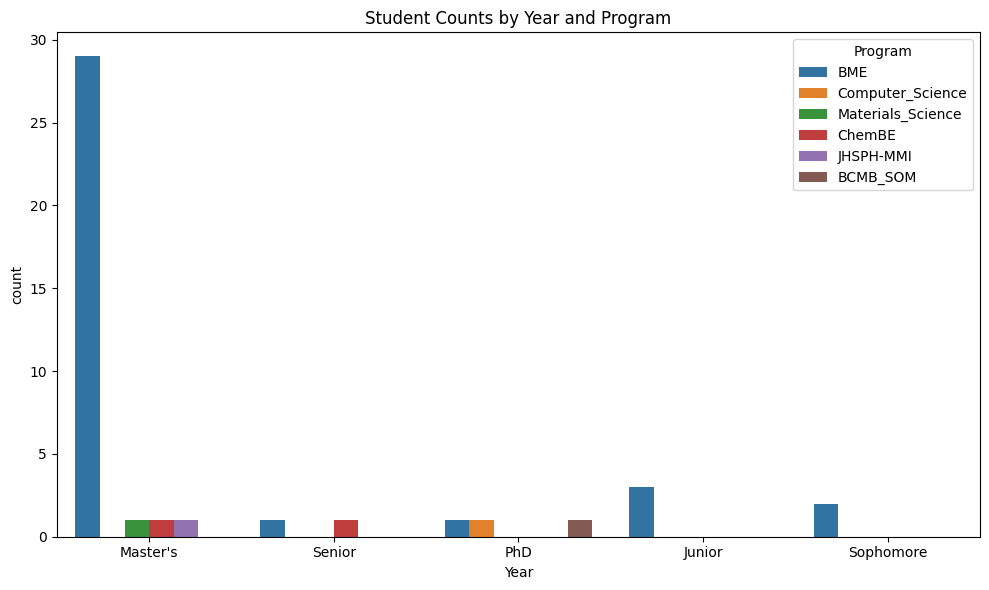

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the class data from the URL into a pandas DataFrame
# Assuming the .txt file is tab-separated based on common conventions for such files.
class_interests_df = pd.read_csv('https://raw.githubusercontent.com/bcaffo/ds4bme/master/data/classInterests.txt', sep='\t')

plt.figure(figsize=(10,6))
sns.countplot(data=class_interests_df, x="Year", hue="Program")
plt.title("Student Counts by Year and Program")
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Raw GitHub URL for the healthcare data
healthcare_url = 'https://raw.githubusercontent.com/bcaffo/ds4bme/main/data/healthcare.csv'

# Load the data, skipping the first 2 rows of metadata
healthcare_df = pd.read_csv(healthcare_url, skiprows=2)

print("First 5 rows of healthcare_df:")
display(healthcare_df.head())
print("\nDataFrame Info:")
healthcare_df.info()

First 5 rows of healthcare_df:


,Location,1991__Total Health Spending,1992__Total Health Spending,1993__Total Health Spending,1994__Total Health Spending,1995__Total Health Spending,1996__Total Health Spending,1997__Total Health Spending,1998__Total Health Spending,1999__Total Health Spending,...,2005__Total Health Spending,2006__Total Health Spending,2007__Total Health Spending,2008__Total Health Spending,2009__Total Health Spending,2010__Total Health Spending,2011__Total Health Spending,2012__Total Health Spending,2013__Total Health Spending,2014__Total Health Spending
0,United States,675896.0,731455.0,778684.0,820172.0,869578.0,917540.0,969531.0,1026103.0,1086280.0,...,1696222.0,1804672.0,1918820.0,2010690.0,2114221.0,2194625.0,2272582.0,2365948.0,2435624.0,2562824.0
1,Alabama,10393.0,11284.0,12028.0,12742.0,13590.0,14450.0,15462.0,15860.0,16451.0,...,25338.0,26638.0,27700.0,28765.0,30095.0,30728.0,31398.0,32848.0,33788.0,35263.0
2,Alaska,1458.0,1558.0,1661.0,1728.0,1879.0,2076.0,2240.0,2386.0,2569.0,...,4765.0,5048.0,5426.0,5807.0,6112.0,6519.0,6928.0,7406.0,7684.0,8151.0
3,Arizona,9269.0,9815.0,10655.0,11364.0,12042.0,12850.0,13418.0,14465.0,15550.0,...,28190.0,30766.0,33366.0,35547.0,37258.0,38620.0,39295.0,40495.0,41481.0,43356.0
4,Arkansas,5632.0,6022.0,6397.0,6810.0,7343.0,7817.0,8393.0,8814.0,9407.0,...,14611.0,15431.0,16426.0,17246.0,18071.0,18735.0,19356.0,20076.0,20500.0,21980.0



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Location                     61 non-null     object 
 1   1991__Total Health Spending  52 non-null     float64
 2   1992__Total Health Spending  52 non-null     float64
 3   1993__Total Health Spending  52 non-null     float64
 4   1994__Total Health Spending  52 non-null     float64
 5   1995__Total Health Spending  52 non-null     float64
 6   1996__Total Health Spending  52 non-null     float64
 7   1997__Total Health Spending  52 non-null     float64
 8   1998__Total Health Spending  52 non-null     float64
 9   1999__Total Health Spending  52 non-null     float64
 10  2000__Total Health Spending  52 non-null     float64
 11  2001__Total Health Spending  52 non-null     float64
 12  2002__Total Health Spending  52 non-null     float64
 13  2003_

/tmp/ipython-input-3939523006.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


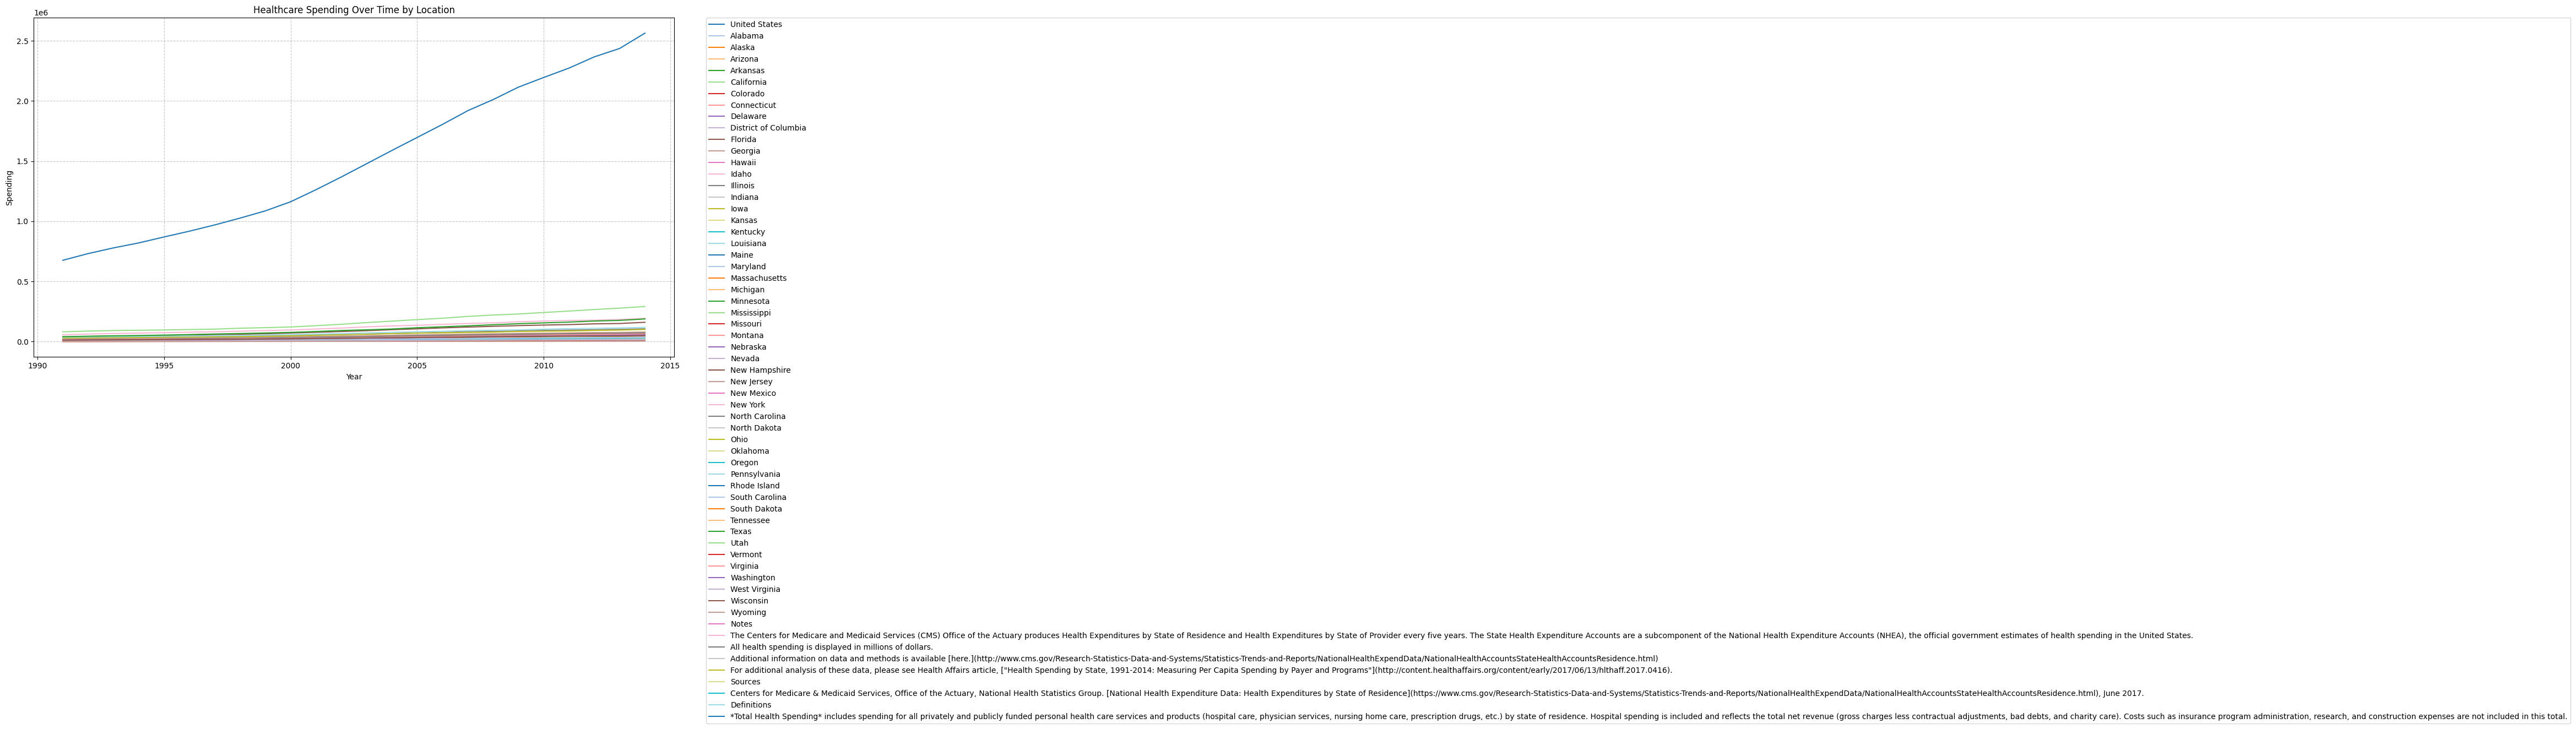

In [7]:
# The dataset appears to have years as columns and states as rows.
# To plot spending versus time (years) for each state, we need to 'melt' the DataFrame.
# Identify year columns (assuming they are numerical and not 'State' or 'Region')
# For simplicity, let's assume columns from '1991' onwards are years.
# We need to find the actual year columns from the df.columns

# Let's dynamically find the year columns.
# Assuming year columns are all numerical and represent years.
year_columns = [col for col in healthcare_df.columns if 'Total Health Spending' in col]

# Extract just the year from the column name for the value_vars
year_only_columns = [col.split('__')[0] for col in year_columns]

# Melt the DataFrame to long format for plotting
healthcare_long_df = healthcare_df.melt(id_vars=['Location'],
                                        value_vars=year_columns,
                                        var_name='Year',
                                        value_name='Spending')

# Convert 'Year' to numeric type for plotting, extracting the year number
healthcare_long_df['Year'] = healthcare_long_df['Year'].apply(lambda x: int(x.split('__')[0]))

plt.figure(figsize=(15, 8))
sns.lineplot(data=healthcare_long_df, x='Year', y='Spending', hue='Location', palette='tab20')
plt.title('Healthcare Spending Over Time by Location')
plt.xlabel('Year')
plt.ylabel('Spending')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # Move legend outside
plt.tight_layout()
plt.show()

/tmp/ipython-input-3790441926.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


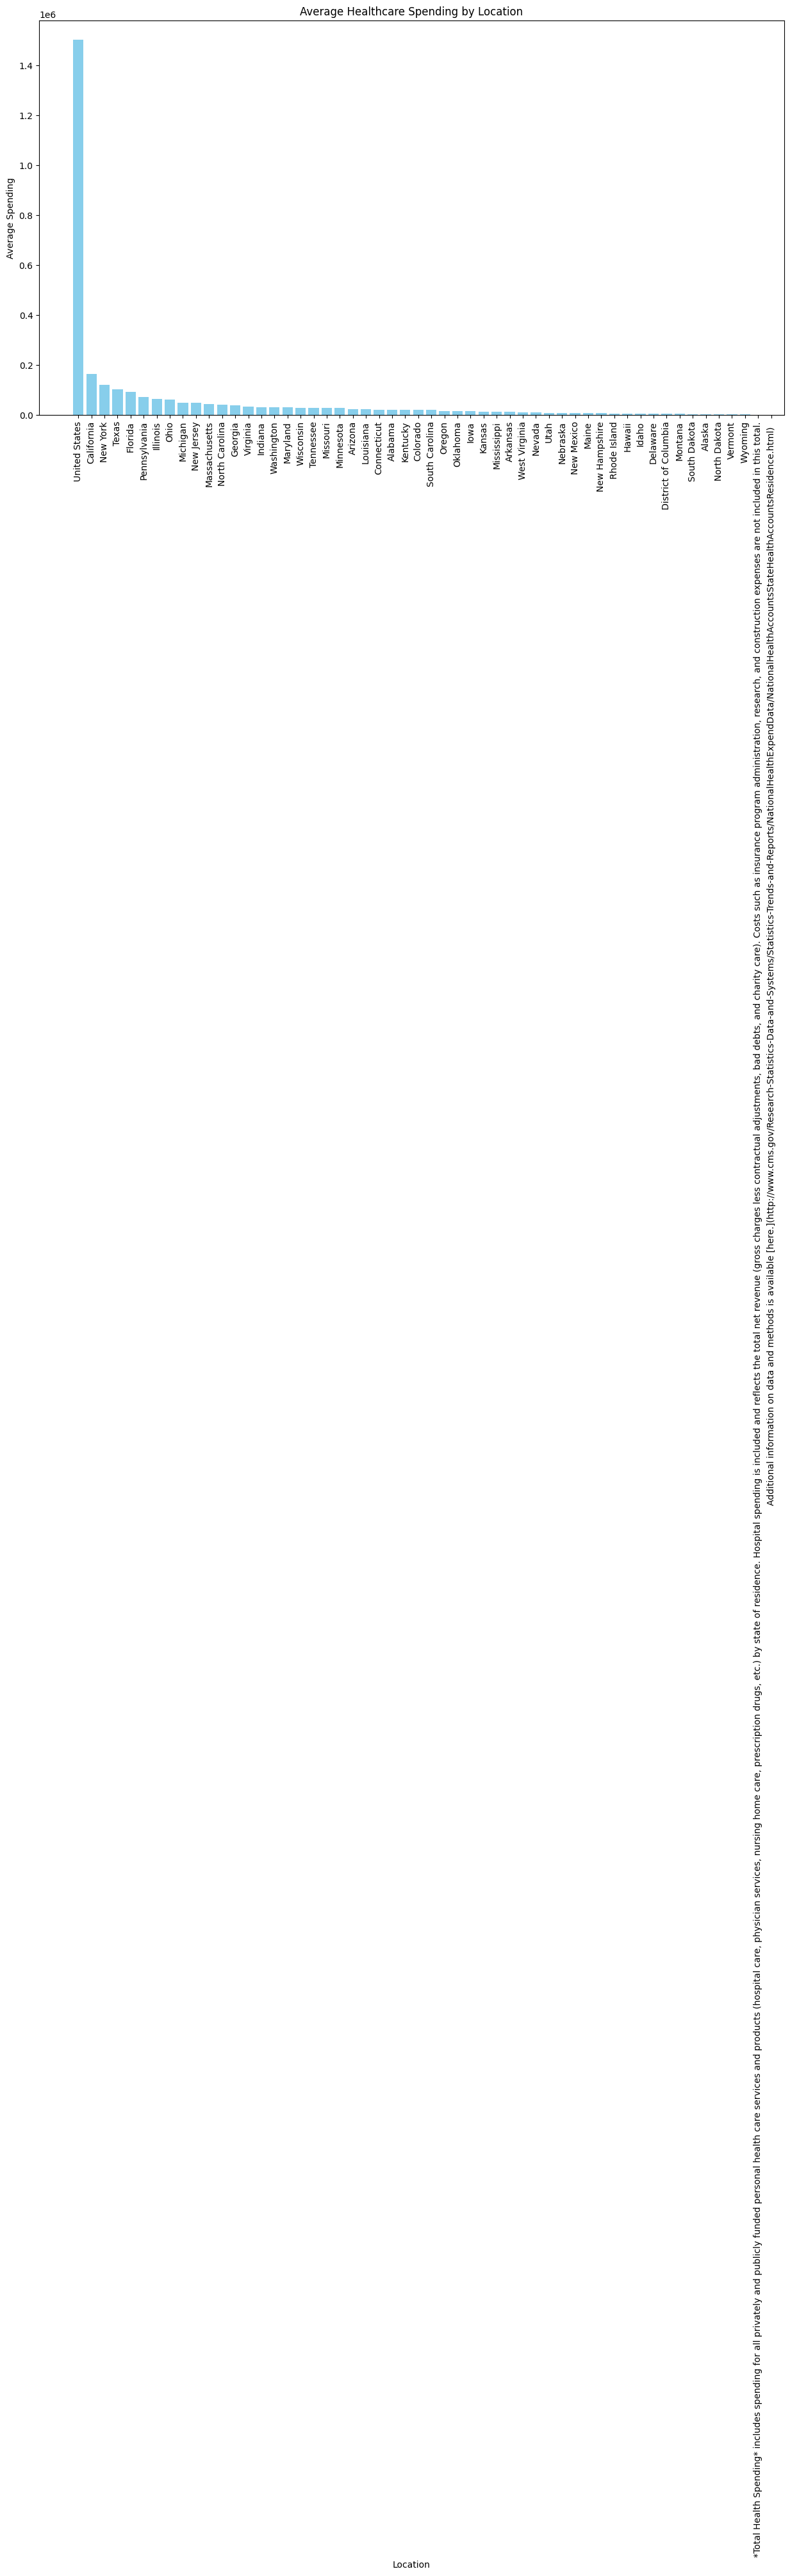

In [8]:
import matplotlib.pyplot as plt

# Calculate the average healthcare spending by Location
average_spending_by_location = healthcare_long_df.groupby('Location')['Spending'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15, 8))
plt.bar(average_spending_by_location['Location'], average_spending_by_location['Spending'], color='skyblue')
plt.title('Average Healthcare Spending by Location')
plt.xlabel('Location')
plt.ylabel('Average Spending')
plt.xticks(rotation=90) # Rotate labels for better readability
plt.tight_layout()
plt.show()